<a href="https://colab.research.google.com/github/peumuoe/Mid-project/blob/main/mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1. 라이브러리 불러오기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

# Step 2. Colab에 업로드된 파일 확인 (파일 경로 자동 찾기)
file_list = os.listdir("/content/")  # Colab 내 업로드된 파일 목록 확인
csv_files = [file for file in file_list if file.endswith(".csv")]  # CSV 파일만 필터링

if len(csv_files) == 0:
    raise FileNotFoundError("❌ CSV 파일이 없습니다. Colab에 파일을 업로드했는지 확인하세요.")
else:
    file_path = f"/content/{csv_files[0]}"  # 가장 먼저 업로드된 CSV 파일 사용
    print(f"✅ 불러온 파일: {file_path}")

# Step 3. 데이터 불러오기
df = pd.read_csv(file_path)

# Step 4. 컬럼명 통일 (대소문자 혼합된 부분 수정)
df.rename(columns={
    "raisedhands": "RaisedHands",
    "VisITedResources": "VisitedResources",
    "AnnouncementsView": "ViewingAnnouncements",
    "Discussion": "DiscussionGroups",
    "StudentAbsenceDays": "StudentAbsenceDays",
}, inplace=True)

# Step 5. StageID (교육 단계) 변환 (범주형 → 숫자형)
stage_mapping = {"lowerlevel": 0, "MiddleSchool": 1, "HighSchool": 2}
df["StageID"] = df["StageID"].map(stage_mapping)

# Step 6. StudentAbsenceDays (결석일 수) 변환 (범주형 → 숫자형)
absence_mapping = {"Under-7": 0, "Above-7": 1}
df["StudentAbsenceDays"] = df["StudentAbsenceDays"].map(absence_mapping)

# Step 7. 학습 행동 관련 변수 정규화 (MinMax Scaling)
scaler = MinMaxScaler()
scaled_features = ["RaisedHands", "VisitedResources", "ViewingAnnouncements", "DiscussionGroups"]
df[scaled_features] = scaler.fit_transform(df[scaled_features])

# Step 8. 전처리된 데이터 확인
print(df.head())

# Step 9. 전처리된 데이터 저장 (Colab 내 파일로 저장)
processed_file_path = "/content/processed_xAPI-Edu-Data.csv"
df.to_csv(processed_file_path, index=False)
print(f"✅ 전처리 완료! 파일이 저장되었습니다: {processed_file_path}")


✅ 불러온 파일: /content/processed_xAPI-Edu-Data.csv
  gender NationalITy PlaceofBirth  StageID GradeID SectionID Topic Semester  \
0      M          KW       KuwaIT      NaN    G-04         A    IT        F   
1      M          KW       KuwaIT      NaN    G-04         A    IT        F   
2      M          KW       KuwaIT      NaN    G-04         A    IT        F   
3      M          KW       KuwaIT      NaN    G-04         A    IT        F   
4      M          KW       KuwaIT      NaN    G-04         A    IT        F   

  Relation  RaisedHands  VisitedResources  ViewingAnnouncements  \
0   Father         0.15          0.161616              0.020408   
1   Father         0.20          0.202020              0.030612   
2   Father         0.10          0.070707              0.000000   
3   Father         0.30          0.252525              0.051020   
4   Father         0.40          0.505051              0.122449   

   DiscussionGroups ParentAnsweringSurvey ParentschoolSatisfaction  \
0    

In [ ]:
from google.colab import files
files.download("/content/processed_xAPI-Edu-Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving processed_xAPI-Edu-Data.csv to processed_xAPI-Edu-Data (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    int64  
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   RaisedHands               480 non-null    float64
 10  VisitedResources          480 non-null    float64
 11  ViewingAnnouncements      480 non-null    float64
 12  DiscussionGroups          480 non-null    float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


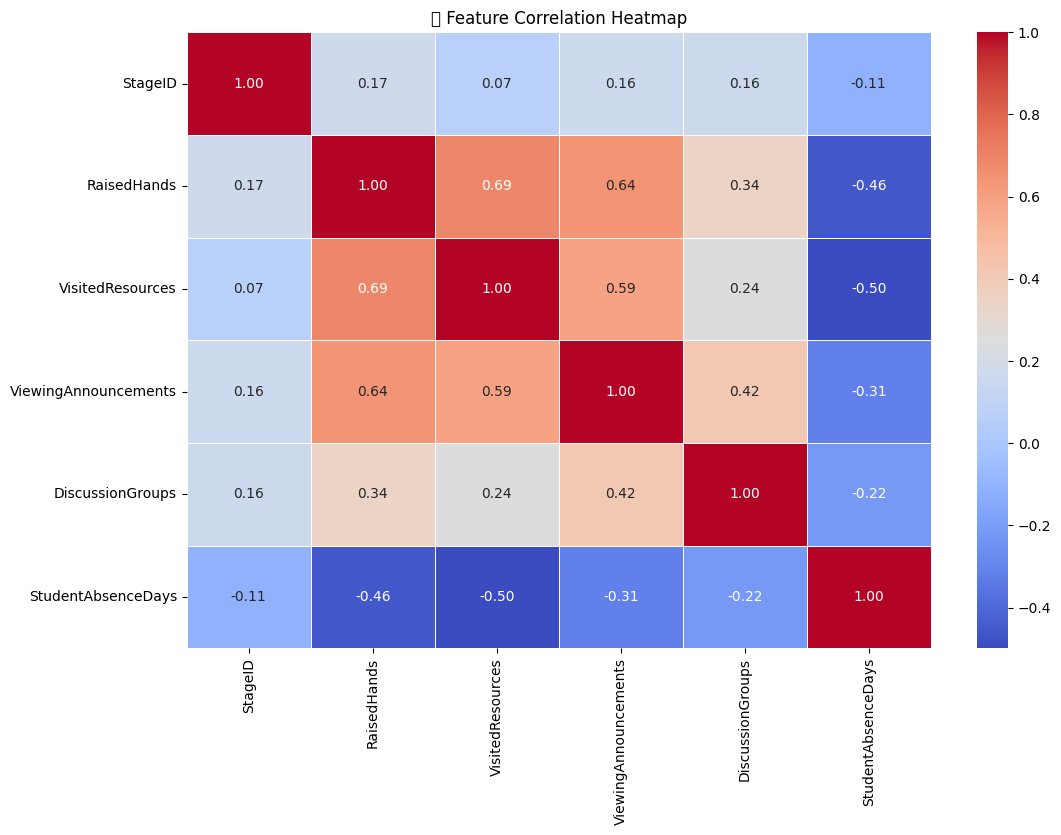

In [ ]:
# Step 1. 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2. Colab에 업로드된 파일 불러오기
from google.colab import files
uploaded = files.upload()  # Colab에서 직접 CSV 파일 업로드
file_name = list(uploaded.keys())[0]  # 업로드된 파일 이름 저장
df = pd.read_csv(file_name)

# Step 3. 데이터 타입 확인 (정규화된 변수 포함)
print(df.info())

# Step 4. 상관 행렬 계산
correlation_matrix = df.corr(numeric_only=True)

# Step 5. 상관 행렬 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📊 Feature Correlation Heatmap")
plt.show()


# **성적분포도**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


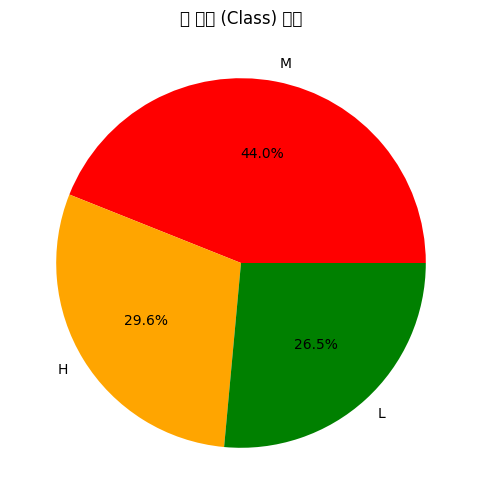

<ipython-input-4-a0c97c153a73>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from f

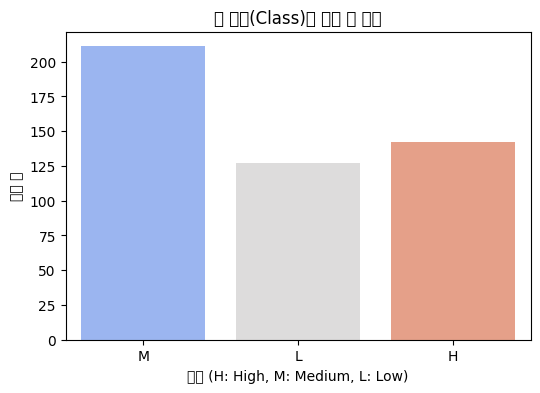

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성적(Class) 분포 시각화 (파이 차트)
plt.figure(figsize=(6,6))
df["Class"].value_counts().plot.pie(autopct='%1.1f%%', colors=["red", "orange", "green"])
plt.title("📊 성적 (Class) 분포")
plt.ylabel("")
plt.show()

# 성적(Class) 분포 (바 차트)
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="coolwarm")
plt.title("📊 성적(Class)별 학생 수 분포")
plt.xlabel("성적 (H: High, M: Medium, L: Low)")
plt.ylabel("학생 수")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

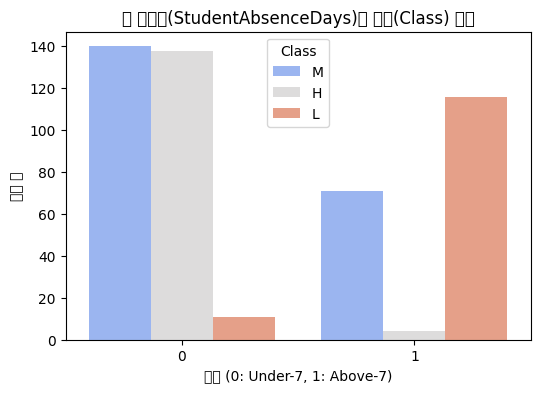

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="StudentAbsenceDays", hue="Class", data=df, palette="coolwarm")
plt.title("📊 결석일(StudentAbsenceDays)과 성적(Class) 관계")
plt.xlabel("출석 (0: Under-7, 1: Above-7)")
plt.ylabel("학생 수")
plt.show()


# **결석일과** **성적의** **상관관계**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    int64  
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   RaisedHands               480 non-null    float64
 10  VisitedResources          480 non-null    float64
 11  ViewingAnnouncements      480 non-null    float64
 12  DiscussionGroups          480 non-null    float64
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

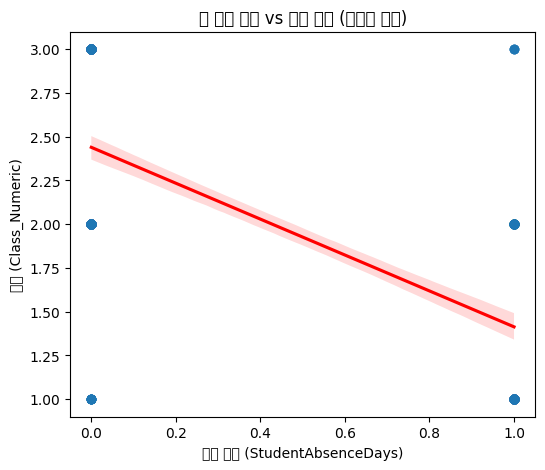


📊 ANOVA 결과:
                      sum_sq     df           F        PR(>F)
C(Absence_Group)  121.016331    1.0  392.135296  3.597526e-64
Residual          147.514919  478.0         NaN           NaN


<ipython-input-12-78d6ee4a6b59>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absence_Group", y="Class_Numeric", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL S

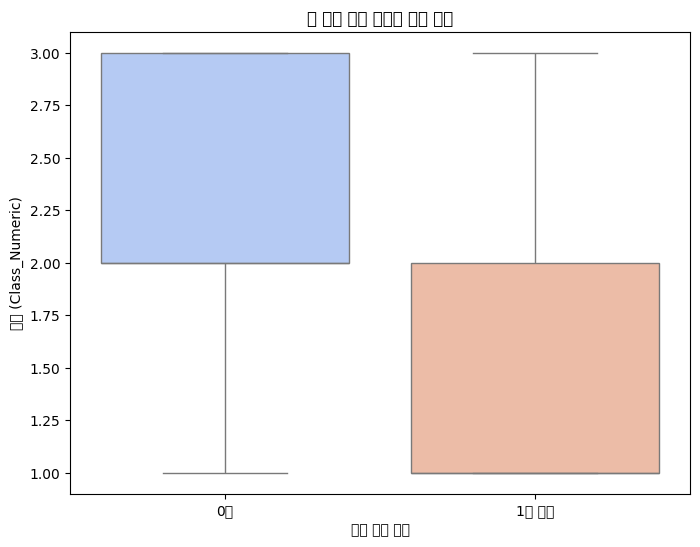


📌 그룹이 2개뿐이라 Tukey HSD 분석을 수행할 수 없습니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ✅ CSV 파일 로드 (파일 경로 수정 필요)
file_path = "/content/processed_xAPI-Edu-Data (1).csv"
df = pd.read_csv(file_path)

# ✅ 데이터프레임 정보 확인
print(df.info())
print(df.head())

# ✅ 데이터 전처리
df["Class_Numeric"] = df["Class"].map({"H": 3, "M": 2, "L": 1})

# ✅ 결석 횟수 최대값 확인
max_absences = df["StudentAbsenceDays"].max()
print(f"📌 결석 횟수 최대값: {max_absences}")

# ✅ bins 설정 (결석이 0~1밖에 없으면 단순 그룹화)
if max_absences <= 1:
    df["Absence_Group"] = df["StudentAbsenceDays"].map({0: "0회", 1: "1회 이상"})
else:
    bins = [0, 3, 7, 15, max_absences]
    labels = ["0-3", "4-7", "8-15", f"16+ (Max={max_absences})"]
    df["Absence_Group"] = pd.cut(df["StudentAbsenceDays"], bins=bins, labels=labels, right=False)

df["Absence_Group"] = df["Absence_Group"].astype("category")

# ✅ 상관관계 분석
corr_absences_class = df["StudentAbsenceDays"].corr(df["Class_Numeric"])
print(f"📊 결석과 성적(Class_Numeric)의 상관계수: {corr_absences_class:.4f}")

# ✅ 회귀 분석 및 시각화
plt.figure(figsize=(6,5))
sns.regplot(x="StudentAbsenceDays", y="Class_Numeric", data=df, ci=95, line_kws={"color": "red"})
plt.title("📉 결석 횟수 vs 성적 관계 (회귀선 포함)")
plt.xlabel("결석 횟수 (StudentAbsenceDays)")
plt.ylabel("성적 (Class_Numeric)")
plt.show()

# ✅ ANOVA 분석
model = ols("Class_Numeric ~ C(Absence_Group)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 ANOVA 결과:")
print(anova_table)

# ✅ 박스플롯 (결석 그룹별 성적 비교)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Absence_Group", y="Class_Numeric", data=df, palette="coolwarm")
plt.title("📊 결석 횟수 그룹별 성적 비교")
plt.xlabel("결석 횟수 그룹")
plt.ylabel("성적 (Class_Numeric)")
plt.show()

# ✅ 사후 분석 (Tukey HSD Test, 데이터가 2개 그룹이면 스킵)
if df["Absence_Group"].nunique() > 2:
    tukey = pairwise_tukeyhsd(df["Class_Numeric"], df["Absence_Group"])
    print("\n📊 Tukey HSD 사후 분석 결과:")
    print(tukey)
else:
    print("\n📌 그룹이 2개뿐이라 Tukey HSD 분석을 수행할 수 없습니다.")


<ipython-input-5-779b461db5a7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Absence_Group", y="Class_Numeric", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


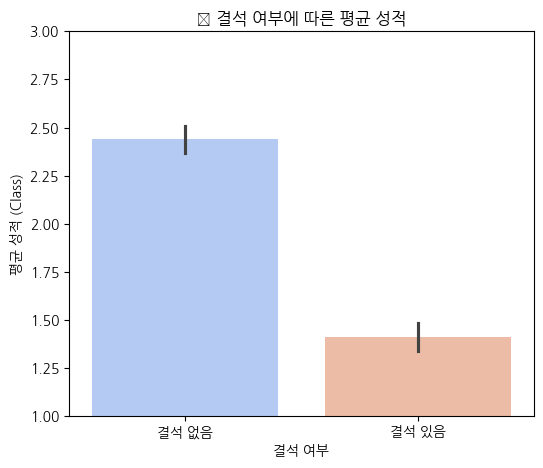

<ipython-input-5-779b461db5a7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absence_Group", y="Class_Numeric", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


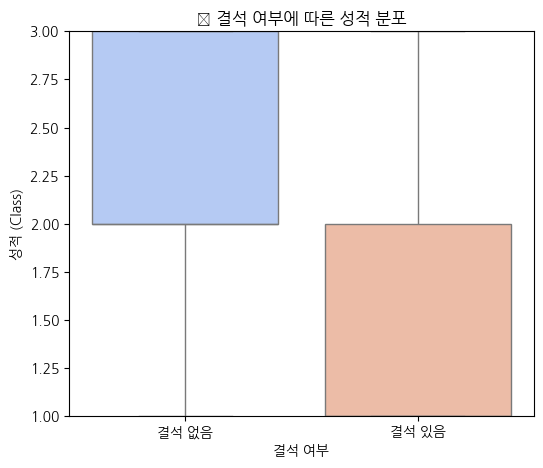

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 데이터 로드 (파일 경로 수정 필요)
file_path = "/content/processed_xAPI-Edu-Data.csv"
df = pd.read_csv(file_path)

# ✅ 성적을 수치형으로 변환 (Class_Numeric: H=3, M=2, L=1)
df["Class_Numeric"] = df["Class"].map({"H": 3, "M": 2, "L": 1})

# ✅ 결석 그룹화 (0=결석 없음, 1=결석 있음)
df["Absence_Group"] = df["StudentAbsenceDays"].map({0: "결석 없음", 1: "결석 있음"})

# ✅ 결석 여부에 따른 성적 평균 비교 (막대 그래프)
plt.figure(figsize=(6,5))
sns.barplot(x="Absence_Group", y="Class_Numeric", data=df, palette="coolwarm")
plt.title("📊 결석 여부에 따른 평균 성적")
plt.xlabel("결석 여부")
plt.ylabel("평균 성적 (Class)")
plt.ylim(1, 3)
plt.show()

# ✅ 결석 여부에 따른 성적 분포 비교 (박스플롯)
plt.figure(figsize=(6,5))
sns.boxplot(x="Absence_Group", y="Class_Numeric", data=df, palette="coolwarm")
plt.title("📊 결석 여부에 따른 성적 분포")
plt.xlabel("결석 여부")
plt.ylabel("성적 (Class)")
plt.ylim(1, 3)
plt.show()


In [ ]:
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# 설치된 폰트 확인
!fc-list | grep "Nanum"


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGo

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 NanumGothic 폰트 경로 확인
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로
font_prop = fm.FontProperties(fname=font_path)  # 폰트 설정

# 한글 폰트 적용
plt.rc("font", family="NanumGothic")
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 변경된 폰트 캐시 리셋 (Colab 환경에서 필요)
fm._load_fontmanager(try_read_cache=False)


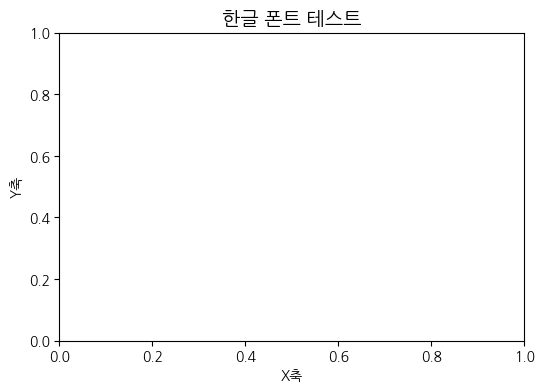

In [ ]:
plt.figure(figsize=(6,4))
plt.title("한글 폰트 테스트", fontsize=14)
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()


<ipython-input-6-566b357ade3b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Absence_Group", y="Class_Numeric", data=df, palette=["cornflowerblue", "salmon"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


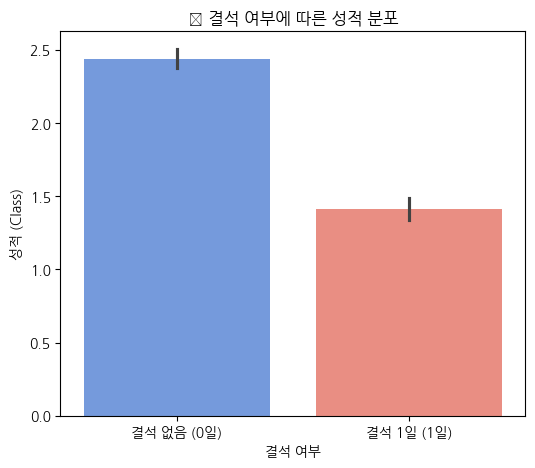

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 결석 그룹 라벨 수정 (0일과 1일만 존재)
df["Absence_Group"] = df["StudentAbsenceDays"].map({0: "결석 없음 (0일)", 1: "결석 1일 (1일)"})

plt.figure(figsize=(6,5))
sns.barplot(x="Absence_Group", y="Class_Numeric", data=df, palette=["cornflowerblue", "salmon"])

# ✅ 한글 제목 및 축 라벨 수정
plt.title("📊 결석 여부에 따른 성적 분포")
plt.xlabel("결석 여부")
plt.ylabel("성적 (Class)")

plt.show()


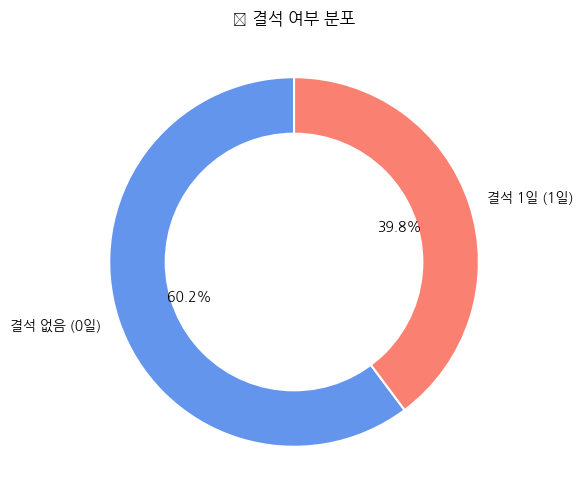

In [ ]:
import matplotlib.pyplot as plt

# ✅ 결석 여부 개수 집계
absence_counts = df["StudentAbsenceDays"].value_counts().sort_index()
labels = ["결석 없음 (0일)", "결석 1일 (1일)"]

# ✅ 색상 설정
colors = ["cornflowerblue", "salmon"]

# ✅ 도넛 그래프 생성
plt.figure(figsize=(6,6))
plt.pie(absence_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

# ✅ 중앙 원 추가 (도넛 형태)
center_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# ✅ 그래프 제목
plt.title("📊 결석 여부 분포")

# ✅ 그래프 출력
plt.show()
